In [2]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, KFold

In [3]:
data = pd.read_excel("Final Data Contrails1.xlsx")

In [4]:
data.head()

,Date,Contrail_Present,Average Temperature,GPM (Feet),Rh Water,Rh Ice,Average Dew,Average windspeed
0,2022-12-16,0,-18.60,42327.83,18.26,14.790,156.78,287.08
1,2022-12-17,0,-22.90,49082.09,10.25,8.180,182.96,61.00
2,2022-12-18,0,-21.50,46396.25,13.80,11.000,177.04,315.05
3,2022-12-19,1,-24.04,46658.30,10.26,8.101,185.50,320.14
4,2022-12-20,0,-20.13,47284.25,13.52,10.590,169.65,289.92


# Logistic Regression

In [5]:
X = data.drop(columns = ["Date","Contrail_Present"])
Y = data.Contrail_Present

In [6]:
X

,Average Temperature,GPM (Feet),Rh Water,Rh Ice,Average Dew,Average windspeed
0,-18.60,42327.83,18.26,14.790,156.78,287.08
1,-22.90,49082.09,10.25,8.180,182.96,61.00
2,-21.50,46396.25,13.80,11.000,177.04,315.05
3,-24.04,46658.30,10.26,8.101,185.50,320.14
4,-20.13,47284.25,13.52,10.590,169.65,289.92
...,...,...,...,...,...,...
79,-17.15,44595.04,18.31,14.460,146.62,182.33
80,-23.22,49536.54,15.18,12.010,180.55,186.44
81,-21.31,48235.37,22.41,17.600,141.81,184.04
82,-14.84,38759.35,23.24,18.550,126.85,166.31


In [7]:
Y

0     0
1     0
2     0
3     1
4     0
     ..
79    1
80    1
81    0
82    0
83    0
Name: Contrail_Present, Length: 84, dtype: int64

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [9]:
# Create a Logistic Regression model
model = LogisticRegression()

In [10]:
# Train the model on the training data
model.fit(X_train, y_train)

LogisticRegression()

In [11]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

In [12]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])

In [13]:
# Print the accuracy
print(f"Accuracy: {accuracy}")
# Print the classification report
print("Classification Report:")
print(report)

Accuracy: 0.47058823529411764
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.43      0.38      0.40         8
     Class 1       0.50      0.56      0.53         9

    accuracy                           0.47        17
   macro avg       0.46      0.47      0.46        17
weighted avg       0.47      0.47      0.47        17



In [14]:
#Visualize the logistic regression
imp = pd.DataFrame(np.absolute(model.coef_[0]))

In [29]:
imp.head()

,index,Importance
0,Dew,0.000102
1,Altitude,0.001595
2,Windspeed,0.010429
3,Temperature,0.034392
4,Humidity Ice,0.086461


In [16]:
imp.rename({0:"Importance"},axis = 1,inplace=True)

In [17]:
#imp.rename({0:"Cloudcover",1:"Dew",2:"Humidity",3:"Temperature",4:"Visibility",5:"Windgust",6:"Windspeed",7:"Slp_change"},inplace = True)

imp.rename({0:"Temperature",1:"Dew",2:"Humidity water",3:"Humidity Ice",4:"Windspeed",5:"Altitude"},inplace = True)

In [18]:
imp.sort_values("Importance",inplace=True)
imp.reset_index(inplace=True)

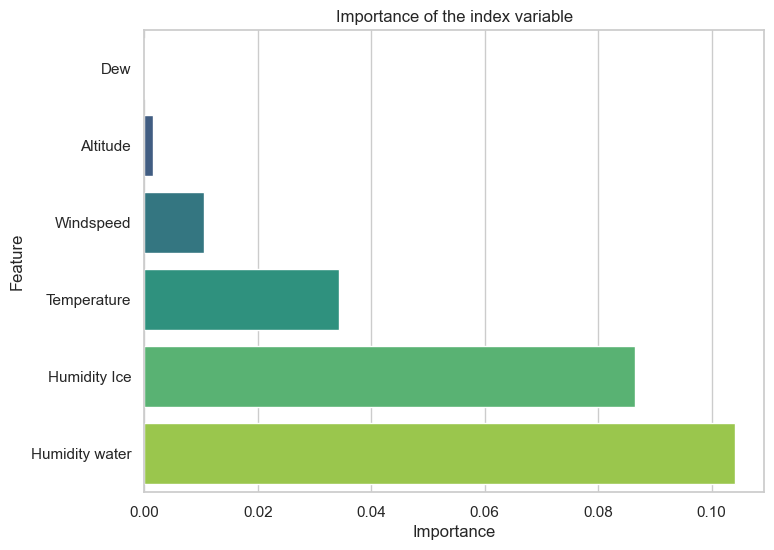

In [19]:
# Create a bar plot
sns.set(style="whitegrid")  # Optional style settings
plt.figure(figsize=(8, 6))  # Set the figure size
sns.barplot(x='Importance', y='index', data=imp, palette="viridis")

# Set labels and title
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Importance of the index variable')

# Display the plot
plt.show()

# Random Forest

In [20]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [21]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
# Make predictions on the testing data
rf_y_pred = rf_model.predict(X_test)

In [23]:
# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_report = classification_report(y_test, rf_y_pred, target_names=['Class 0', 'Class 1'])

In [24]:
# Print the accuracy
print(f"Accuracy: {rf_accuracy}")
# Print the classification report
print("Classification Report:")
print(rf_report)

Accuracy: 0.5882352941176471
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.56      0.62      0.59         8
     Class 1       0.62      0.56      0.59         9

    accuracy                           0.59        17
   macro avg       0.59      0.59      0.59        17
weighted avg       0.59      0.59      0.59        17



In [25]:
# Visualization of Feature Importance in Random Forest
# Get feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_

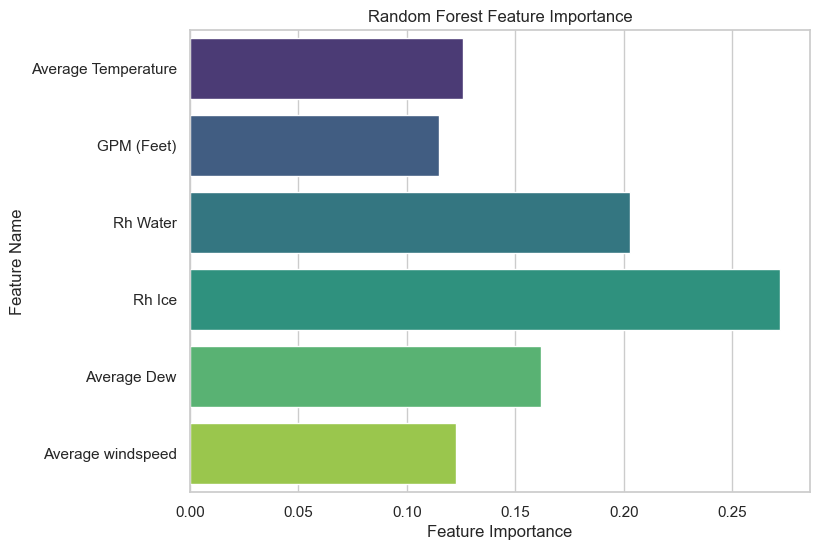

In [26]:
# Create a bar plot to visualize feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=X.columns, palette="viridis")
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Random Forest Feature Importance')
plt.show()

In [27]:
# Create confusion matrices for both models
logistic_confusion_matrix = confusion_matrix(y_test, y_pred)
rf_confusion_matrix = confusion_matrix(y_test, rf_y_pred)

print("Confusion Matrix for Logistic Regression:")
print(logistic_confusion_matrix)

print("\nConfusion Matrix for Random Forest:")
print(rf_confusion_matrix)

Confusion Matrix for Logistic Regression:
[[3 5]
 [4 5]]

Confusion Matrix for Random Forest:
[[5 3]
 [4 5]]


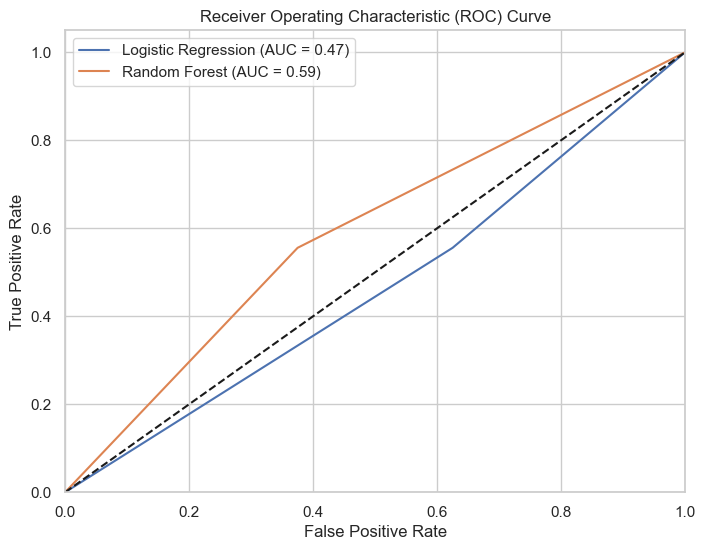

In [28]:
# Calculate ROC curves and AUC for both models
logistic_fpr, logistic_tpr, _ = roc_curve(y_test, y_pred)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_y_pred)

logistic_auc = roc_auc_score(y_test, y_pred)
rf_auc = roc_auc_score(y_test, rf_y_pred)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(logistic_fpr, logistic_tpr, label=f"Logistic Regression (AUC = {logistic_auc:.2f})")
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [30]:
# Select the desired columns as features (X) and target variable (y)
XX = data[['Average Temperature', 'GPM (Feet)', 'Rh Water', 'Rh Ice', 'Average Dew', 'Average windspeed']]
yy = data['Contrail_Present']

In [31]:
# Number of folds for cross-validation
num_folds = 5  # You can adjust the number of folds as needed

In [32]:
# Create a cross-validation object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

In [33]:
# Logistic Regression cross-validation

logistic_regression_scores = cross_val_score(model, XX, yy, cv=kf, scoring='accuracy')

In [34]:
# Random Forest cross-validation
random_forest_scores = cross_val_score(rf_model, XX, yy, cv=kf, scoring='accuracy')

In [35]:
# Print the cross-validation results
print("Logistic Regression Cross-Validation Results:")
print("Accuracy for each fold:", logistic_regression_scores)
print("Mean Accuracy:", np.mean(logistic_regression_scores))
print("Standard Deviation of Accuracy:", np.std(logistic_regression_scores))



Logistic Regression Cross-Validation Results:
Accuracy for each fold: [0.47058824 0.64705882 0.76470588 0.70588235 0.375     ]
Mean Accuracy: 0.5926470588235294
Standard Deviation of Accuracy: 0.1467349374501932


In [36]:
print("\nRandom Forest Cross-Validation Results:")
print("Accuracy for each fold:", random_forest_scores)
print("Mean Accuracy:", np.mean(random_forest_scores))
print("Standard Deviation of Accuracy:", np.std(random_forest_scores))


Random Forest Cross-Validation Results:
Accuracy for each fold: [0.64705882 0.70588235 0.76470588 0.76470588 0.5       ]
Mean Accuracy: 0.6764705882352942
Standard Deviation of Accuracy: 0.09843059135695004


#### 